# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.square(np.subtract(np.sum(X*w, axis=1), y)).mean()
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return (2/len(X))*np.dot(X.T, np.subtract(np.sum(X*w, axis=1), y))


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)
print(X)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99]
 [100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129]
 [130 131 132 133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169]
 [170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189]
 [190 191 192 193 194 195 196 197 198 199]]
27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # из семинара №7 ИАД-3
    trace = np.zeros((n_iterations + 1, X.shape[1]))
    trace[0] = w_init
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w_init)
        w_init = w_init - lr*grad
        trace[i+1] = w_init
    return trace

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(13)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

14.255206205630344
0.940849323969957


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

Learning rate = 0.0001


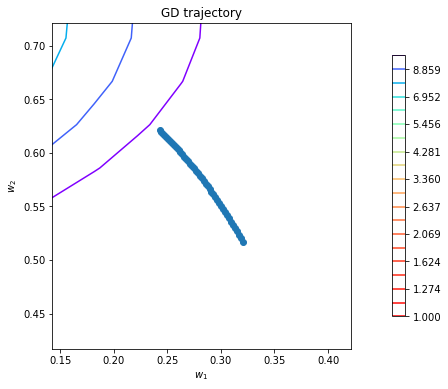

Learning rate = 0.001


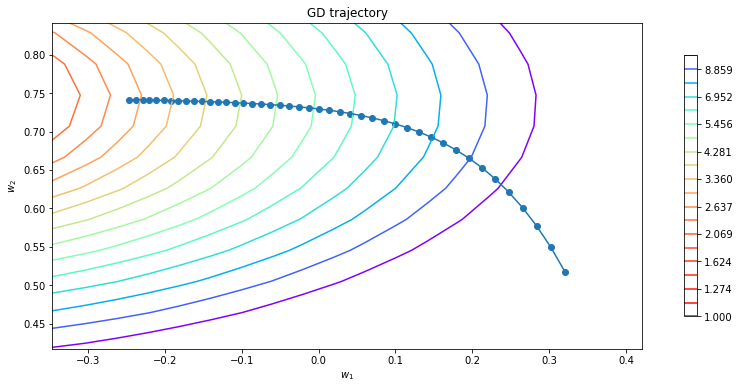

Learning rate = 0.01


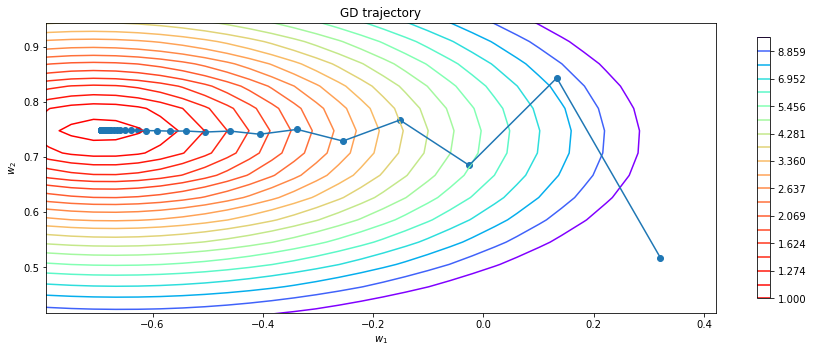

Learning rate = 0.0125


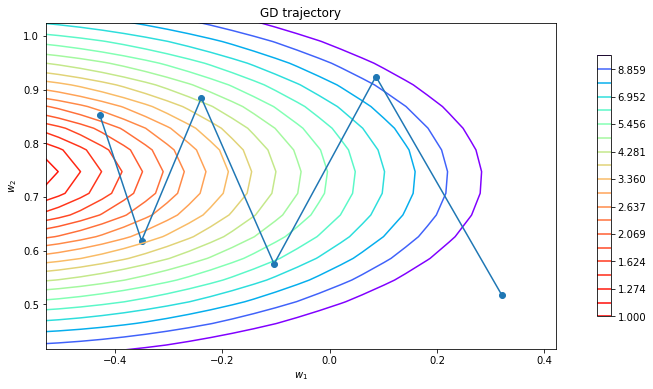

Learning rate = 0.015


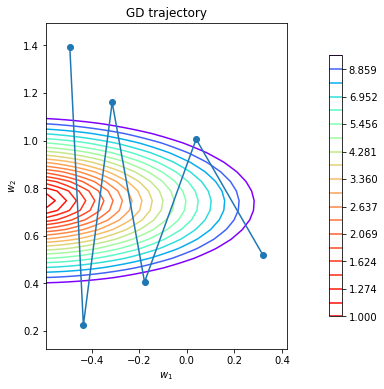

In [9]:
num_steps = 43
for lr in [0.0001, 0.001, 0.01, 0.0125, 0.015]:
    print(f'Learning rate = {lr}')
    if lr > 0.01:
        num_steps = 5
    plot_gd(gradient_descent(w_init, X, y, loss, lr, num_steps), X, y, loss)
# при заданном количестве шагов (43) learning rate 0.0001 слишком мал: он очень точный, но движется медленно
# learning rate 0.001 тоже не подходит, он продвинулся дальше, но минимума за 43 шага достичь не успел
# learning rate 0.01 подходит идеально: он достиг минимума за заданное число шагов, хотя в начале пути его немного штормило
# learnig rate 0.1 слишком большой (добавила значения чуть больше 0.01 и уменьшила для них количество шагов, 
# тогда становится видно, что шаги слишком большие и градиент вообще расходится)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = np.zeros((n_iterations + 1, 2))
    trace[0] = w_init
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        grad = loss.calc_grad(batch, batch_y, w_init)
        w_init = w_init - lr*grad
        trace[i+1] = w_init
    return trace

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Batch size: 1
Learning rate 0.0001


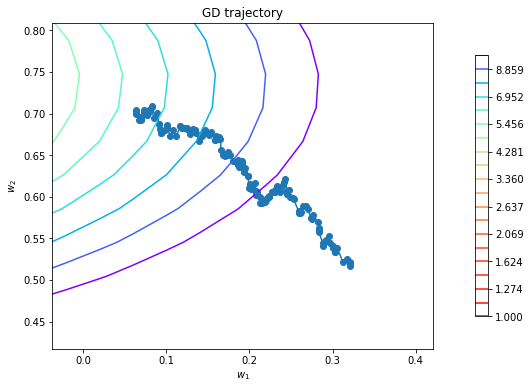

Batch size: 1
Learning rate 0.001


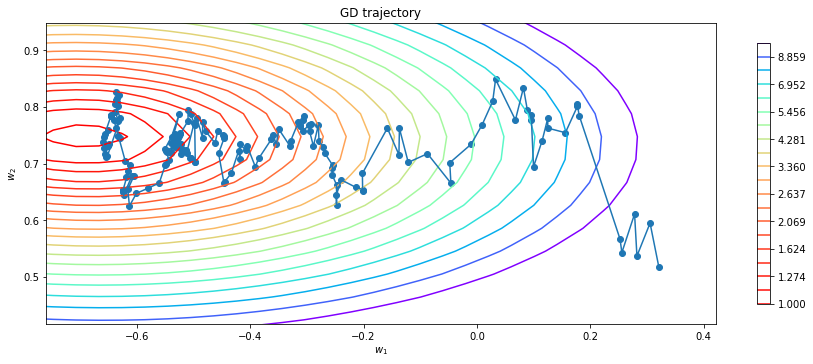

Batch size: 1
Learning rate 0.005


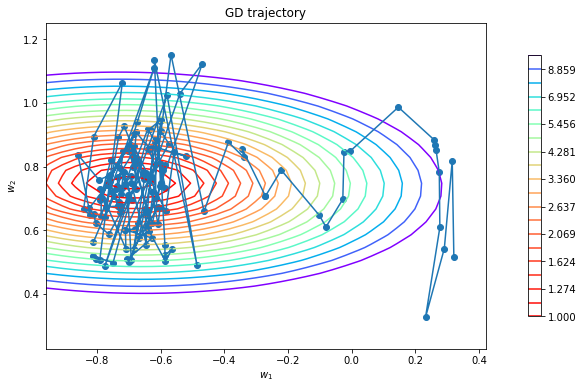

Batch size: 1
Learning rate 0.01


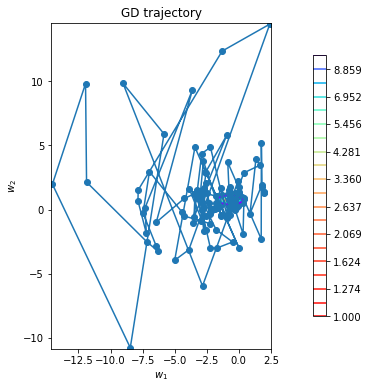

Batch size: 10
Learning rate 0.0001


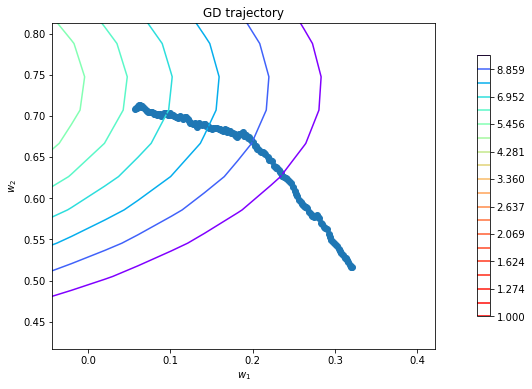

Batch size: 10
Learning rate 0.001


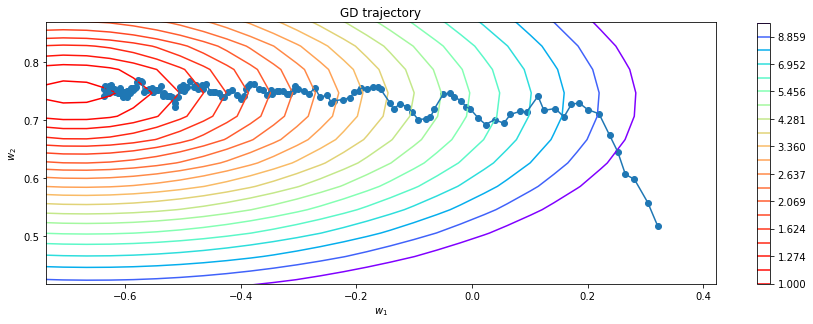

Batch size: 10
Learning rate 0.005


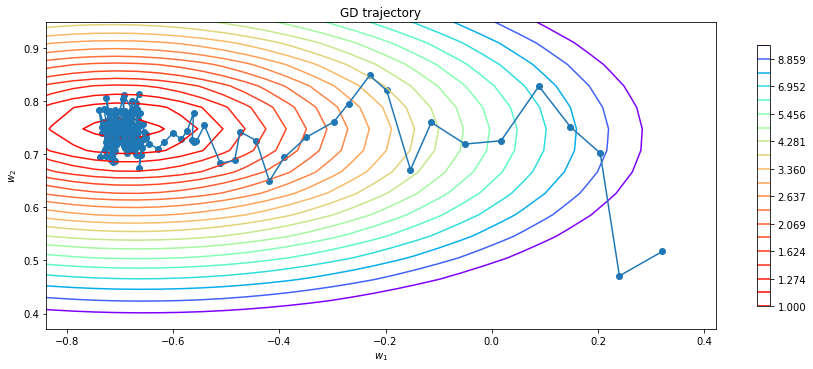

Batch size: 10
Learning rate 0.01


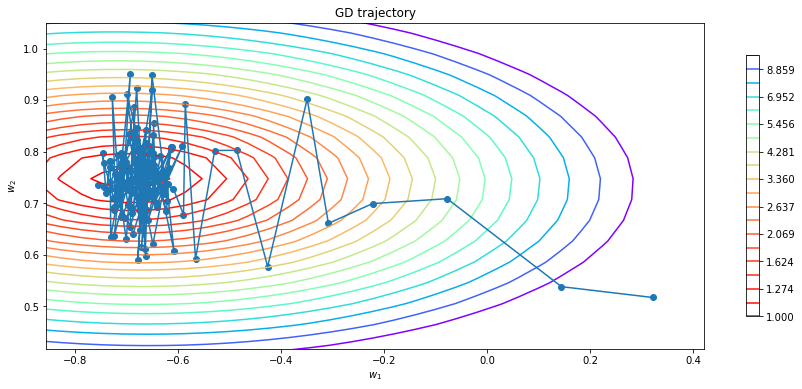

Batch size: 50
Learning rate 0.0001


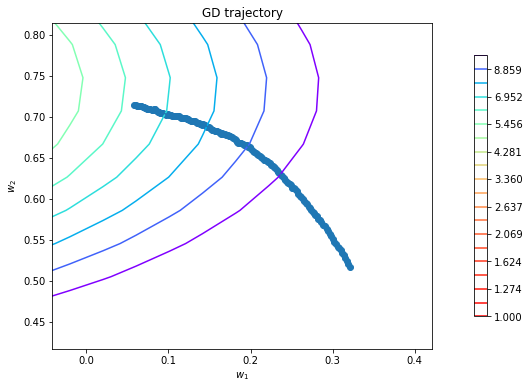

Batch size: 50
Learning rate 0.001


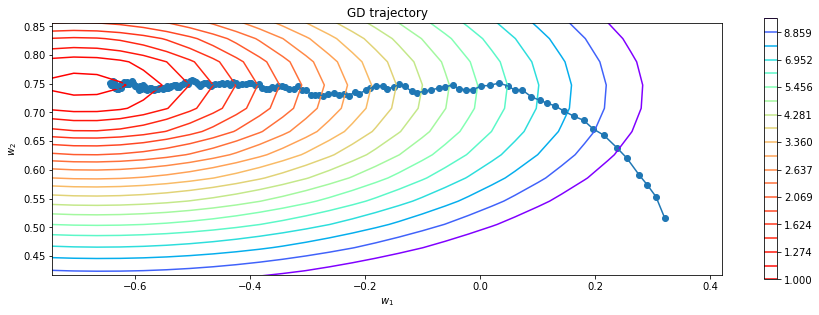

Batch size: 50
Learning rate 0.005


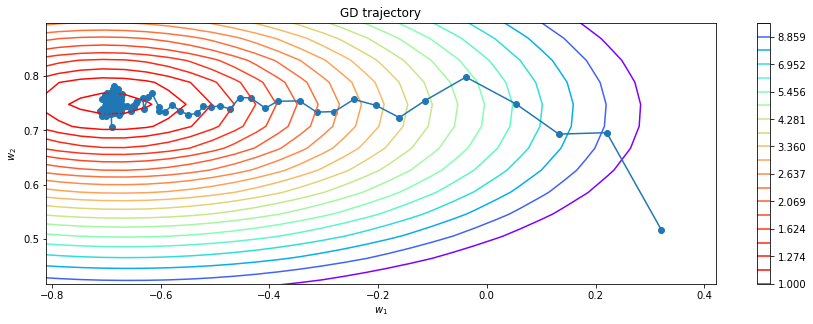

Batch size: 50
Learning rate 0.01


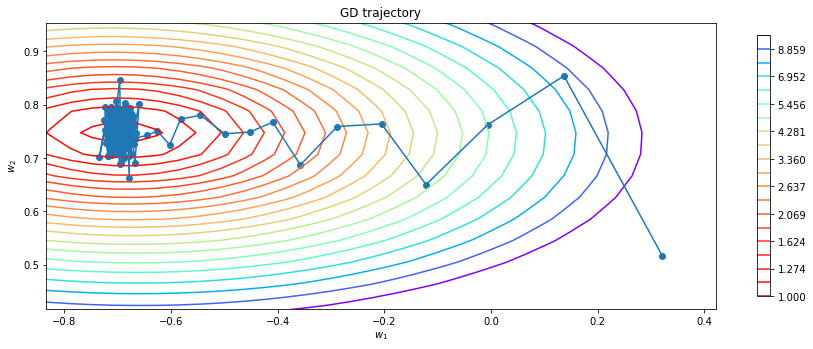

Batch size: 100
Learning rate 0.0001


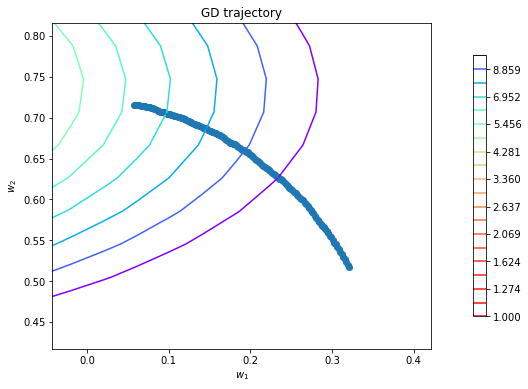

Batch size: 100
Learning rate 0.001


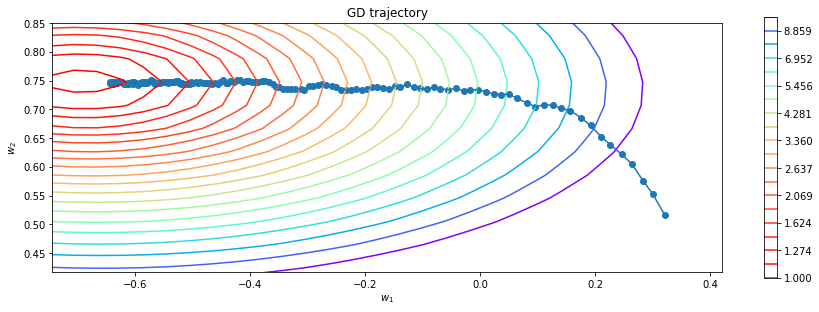

Batch size: 100
Learning rate 0.005


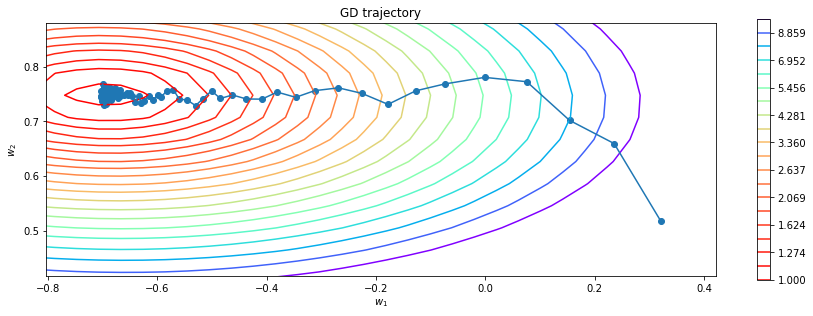

Batch size: 100
Learning rate 0.01


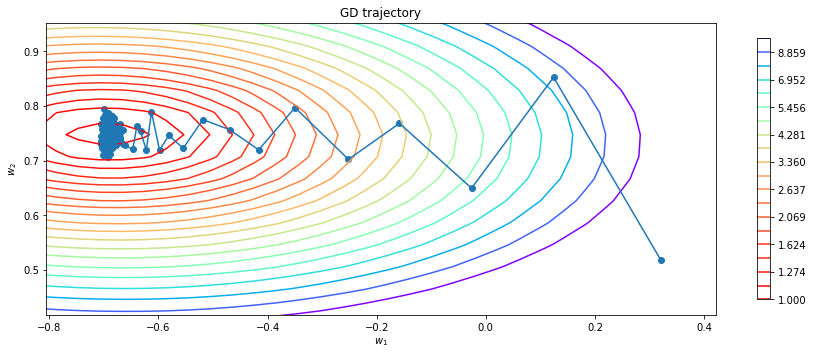

In [11]:
import itertools
for b, lr in list(itertools.product([1, 10, 50, 100], [0.0001, 0.001, 0.005, 0.01])):
    print(f'Batch size: {b}\n'
         f'Learning rate {lr}')
    # количество итераций выбрала 150 (при стохастическом GD 43 нам будет мало)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, b, 160), X, y, loss)

# маленький learning rate компенсирует колебания при маленьком batch size, однако тогда нам нужно очень много итераций
# также можно заметить, что при приближении к минимуму при маленьких batch size колебания тоже очень сильны
# таким образом колебания, мешающие попасть в минимум повышаются при маленьком batch size и относительно большом 
# learning rate (больше 0.05), однако слишком маленький learning rate хоть и увеличивает точность, но требует большее число 
# шагов
# приемлемые комбинации гиперпараметров:
# Batch size: 50, Learning rate 0.005
# Batch size: 100, Learning rate 0.005

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = np.zeros((n_iterations + 1, 2))
    trace[0] = w_init
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        grad = loss.calc_grad(batch, batch_y, w_init)
        eta = lr*((1/(1 + i))**p)
        w_init = w_init - eta*grad
        trace[i+1] = w_init
    return trace

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p: 0.1


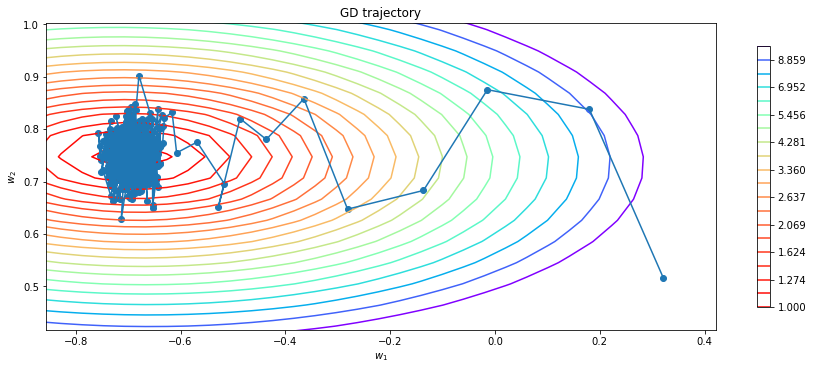

p: 0.3


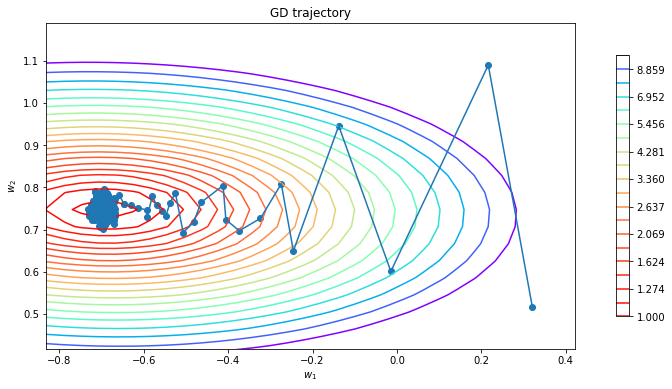

p: 0.7


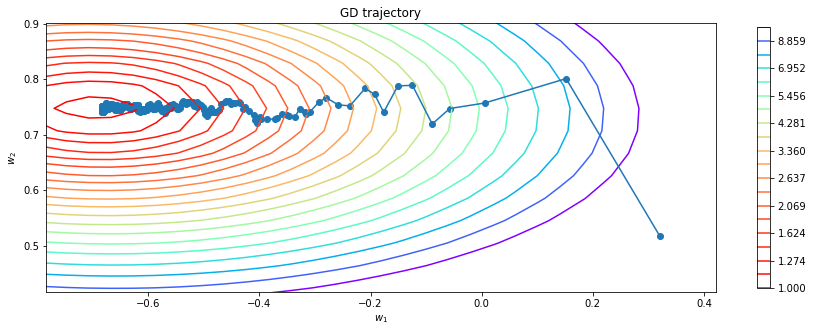

p: 1


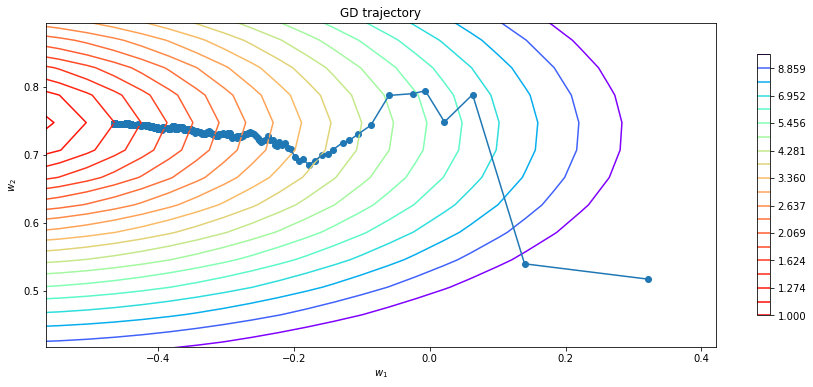

In [13]:
for p_val in [0.1, 0.3, 0.7, 1]:
    print(f'p: {p_val}')
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p_val), X, y, loss)
# оптимальный p = 0.7 - он хорошо сглаживает колебания, позволяя дойти до минимума, 
# меньшие значения недостаточно справляются с этой задачей, большие - уменьшают шаг слишком сильно и за данное число 
# итераций минимум не достигается, хоть и движение в его сторону точное

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

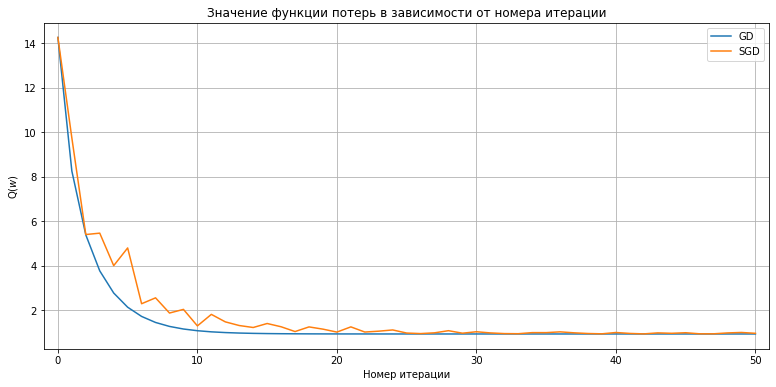

In [14]:
plt.figure(figsize=(13, 6))

loss_gd = []
loss_sgd = []

num_steps = 50
for i in range(num_steps+1):
    loss_gd.append(loss.calc_loss(X, y, gradient_descent(w_init, X, y, loss, 0.01, num_steps)[i]))
    loss_sgd.append(loss.calc_loss(X, y, stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, num_steps)[i]))
    

plt.plot(range(num_steps+1), loss_gd, label='GD')
plt.plot(range(num_steps+1), loss_sgd, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()
# видим, что с примерно 30-й итерации значения loss GD и SGD сходятся. GD приближается к своей асмптоте раньше, 
# однако мы понимаем, что при подсчете градиента используется вся выборка (300 объектов), а в случае SGD объектов всего 10.
# таким образом увеличив количество итераций всего вдвое мы получаем почти то же значение функции потерь, но градиент 
# считается по в 30 раз меньшем числе объектов, что ускоряет поиск минимума в целом

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w = np.full((X.shape[1]), 1)
        # Установила learning rate 0.01, т.к. на нем меньше ошибка
        self.w = gradient_descent(w, X, y, self.loss, 0.01)[-1]        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.pred = X.dot(self.w)
        return self.pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [18]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [19]:
# уберем неинформативный столбец из данных
X_raw = X_raw.drop('index', axis=1)
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [20]:
# проверяем наличие пропусков
X_raw.isna().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [21]:
# заполняем пропуски
from sklearn.impute import SimpleImputer
# создаем маску категориальных признаков
cat_features_mask = (X_raw.dtypes == "object").values
# заполняем пропуски в вещественных признаках средним
mis_replacer = SimpleImputer(strategy="mean")
X_float = pd.DataFrame(data=mis_replacer.fit_transform(X_raw[X_raw.columns[~cat_features_mask]]), 
                            columns=X_raw[X_raw.columns[~cat_features_mask]].columns)
# пропуски в категориальных признаках заполняем пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
# соединяем вещественный и категориальный датафреймы без пропусков
X_no_mis = pd.concat([X_float, X_cat], axis=1).sort_index(axis=1)
X_no_mis.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [22]:
# кодируем категориальные признаки с помощью One-Hot кодирования
X_encoded = pd.get_dummies(X_no_mis, columns=X_no_mis.columns[cat_features_mask], drop_first=True)
X_encoded

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# делим выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

In [24]:
# масштабируем признаки
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_train_transformed

array([[1.        , 0.40314136, 0.29154519, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.19895288, 0.2303207 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.08376963, 0.26530612, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.29842932, 0.46938776, ..., 1.        , 0.        ,
        0.        ],
       [0.4       , 0.19371728, 0.303207  , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.21465969, 0.28862974, ..., 0.        , 0.        ,
        0.        ]])

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [25]:
linear_regression.fit(X_train_transformed, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [26]:
from sklearn.metrics import mean_squared_error


lr_mse_train = mean_squared_error(y_train, linear_regression.predict(X_train_transformed))
lr_mse_test = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))

print(f'Linear regression (without regularization) train MSE: {lr_mse_train}\n'
      f'Linear regression (without regularization) test MSE: {lr_mse_test}\n')

Linear regression (without regularization) train MSE: 1888249.1787022762
Linear regression (without regularization) test MSE: 4883726.71067102



Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [27]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return (np.square(np.subtract(np.sum(X*w, axis=1), y)) + self.coef * ((w[:len(w)-1]))**2).mean()

        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        new_w = w.copy()
        new_w[-1] = 0

        return (2/len(X)) * np.dot(X.T, np.subtract(np.sum(X*w, axis=1), y)) + 2 * self.coef * new_w


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [28]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [29]:
lambdas = [0.0005, 0.001, 0.01, 0.1, 1, 10]
lambdas_df = []
for l in lambdas:
    linear_regression = LinearRegression(MSEL2Loss(l))
    linear_regression.fit(X_train_transformed, y_train)
    lr_mse_train_2 = mean_squared_error(y_train, linear_regression.predict(X_train_transformed))
    lr_mse_test_2 = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
    lambdas_df.append([l, lr_mse_train_2, lr_mse_test_2])
lambdas_df = pd.DataFrame(lambdas_df, columns = ['lambda', 'train MSE', 'test MSE'])
best_lambda = lambdas_df['lambda'].loc[lambdas_df['test MSE'].idxmin()]
print(f'The best lambda is {best_lambda}')
lambdas_df

The best lambda is 0.001


,lambda,train MSE,test MSE
0,0.0005,2.067540e+06,4.188193e+06
1,0.0010,2.250422e+06,3.918403e+06
2,0.0100,3.944588e+06,4.741390e+06
3,0.1000,1.045938e+07,8.945732e+06
4,1.0000,3.122237e+07,2.138592e+07
5,10.0000,6.022507e+07,4.362417e+07


In [30]:
# Сравним с регрессией без регуляризации
linear_regression = LinearRegression(MSEL2Loss(best_lambda))
linear_regression.fit(X_train_transformed, y_train)
lr_mse_train_2 = mean_squared_error(y_train, linear_regression.predict(X_train_transformed))
lr_mse_test_2 = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
print(f'Linear regression (without regularization) train MSE: {lr_mse_train}\n'
      f'Linear regression (without regularization) test MSE: {lr_mse_test}\n'
      f'Linear regression (with l2-regularization) train MSE: {lr_mse_train_2}\n'
      f'Linear regression (with l2-regularization) test MSE: {lr_mse_test_2}\n')
# регуляризация уменьшила ошибку на тестовой выборке

Linear regression (without regularization) train MSE: 1888249.1787022762
Linear regression (without regularization) test MSE: 4883726.71067102
Linear regression (with l2-regularization) train MSE: 2250421.7232690766
Linear regression (with l2-regularization) test MSE: 3918402.8593513505



В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [31]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        def func(z):
            if abs(z) < self.eps:
                return 0.5*z**2
            else:
                return self.eps*(abs(z) - 0.5*self.eps)
        vect_func = np.vectorize(func)
        return vect_func(np.subtract(np.sum(X*w, axis=1), y)).mean()

        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        def grad_func(z):
            if abs(z) < self.eps:
                return z
            else:
                return self.eps*abs(z)/z
        vect_func = np.vectorize(grad_func)
        return np.mean(X * (vect_func(np.subtract(np.sum(X*w, axis=1), y))).reshape(-1,1), axis=0)


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [32]:
eps_list = [500, 1000, 1500, 1750, 2000, 5000]
eps_df = []
for eps in eps_list:
    linear_regression = LinearRegression(HuberLoss(eps))
    linear_regression.fit(X_train_transformed, y_train)
    lr_mse_train_3 = mean_squared_error(y_train, linear_regression.predict(X_train_transformed))
    lr_mse_test_3 = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
    eps_df.append([eps, lr_mse_train_3, lr_mse_test_3])
    
eps_df = pd.DataFrame(eps_df, columns = ['eps', 'train MSE', 'test MSE'])
best_eps = eps_df['eps'].loc[eps_df['test MSE'].idxmin()]
print(f'The best eps is {best_eps}')
eps_df

The best eps is 2000


,eps,train MSE,test MSE
0,500,4.069707e+06,4.533216e+06
1,1000,3.563710e+06,3.737924e+06
2,1500,3.194682e+06,3.519052e+06
3,1750,3.100482e+06,3.463528e+06
4,2000,3.013694e+06,3.459012e+06
5,5000,2.308924e+06,3.597237e+06


In [33]:
linear_regression = LinearRegression(HuberLoss(best_eps))
linear_regression.fit(X_train_transformed, y_train)
lr_mse_train_3 = mean_squared_error(y_train, linear_regression.predict(X_train_transformed))
lr_mse_test_3 = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
print(f'Linear regression (without regularization) train MSE: {lr_mse_train}\n'
      f'Linear regression (without regularization) test MSE: {lr_mse_test}\n'
      f'Linear regression (with l2-regularization) train MSE: {lr_mse_train_2}\n'
      f'Linear regression (with l2-regularization) test MSE: {lr_mse_test_2}\n'
      f'Linear regression (with Huber Loss) train MSE: {lr_mse_train_3}\n'
      f'Linear regression (with Huber Loss) test MSE: {lr_mse_test_3}\n')
# Huber Loss уменьшил MSE в сравнении с линейной регрессией без регуляризации и с l2-регуляризацией

Linear regression (without regularization) train MSE: 1888249.1787022762
Linear regression (without regularization) test MSE: 4883726.71067102
Linear regression (with l2-regularization) train MSE: 2250421.7232690766
Linear regression (with l2-regularization) test MSE: 3918402.8593513505
Linear regression (with Huber Loss) train MSE: 3013694.325923029
Linear regression (with Huber Loss) test MSE: 3459011.638621989



### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [34]:
# https://medium.com/swlh/how-to-implement-simulated-annealing-algorithm-in-python-ab196c2f56a0
import random
import math

def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray):
    """Peforms simulated annealing to find a solution"""
    initial_temp = 1000000
    final_temp = 0.1
    alpha = 0.5
    
    current_temp = initial_temp

    # Start by initializing the current state with the initial state
    current_state = w_init
    solution = current_state

    while current_temp > final_temp:
        neighbor = get_neighbors(current_state)

        # Check if neighbor is best so far
        cost_diff = get_cost(X, y, current_state) - get_cost(X, y, neighbor)

        # if the new solution is better, accept it
        if cost_diff > 0:
            solution = neighbor
        # if the new solution is not better, accept it with a probability of e^(-cost/temp)
        else:
            if (-cost_diff / current_temp) > 18 or random.uniform(0, 1) < math.exp(-cost_diff / current_temp):
                solution = neighbor
        # decrement the temperature
        current_temp *= alpha

    return solution

def get_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray):
    return np.square(np.subtract(np.sum(X*w, axis=1), y)).mean()
    
def get_neighbors(old_w):
    new_w = old_w + np.random.standard_t(3, size=old_w.shape)
    return new_w

In [35]:
w_init = np.random.uniform(100, 50, X_train_transformed.shape[1])

sa = simulated_annealing(w_init, X_train_transformed, y_train)

sa_mse_train = mean_squared_error(y_train, 
                                  X_train_transformed.dot(sa))
sa_mse_test = mean_squared_error(y_test, X_test_transformed.dot(sa))

print(f'Linear regression (simulated annealing) train MSE: {sa_mse_train}\n'
      f'Linear regression (simulated annealing) test MSE: {sa_mse_test}\n')
# ошибка выше на 2 порядка, чем при использовании градиентного спуска

Linear regression (simulated annealing) train MSE: 220366272.92497396
Linear regression (simulated annealing) test MSE: 182104865.5036256

